What is Digital Signal Processing? 

- The process whereby real world phenomena can be translated into digital data for analysis, manipulation, and synthesis.

- This is done by sampling a signal with an instrument like a camera or a microphone, which in turn generates a sequence of numbers that represent continuous variables in a domain like time, space, or frequency.

- The fourier takes a waveform and finds its recipe.

Digital Noise Generator:

- Random noise is an important topic in both electronics and DSP. 

- A common need in DSP is to generate signals that resemble various types of random noise. 

- This is required to test the performance of algorithms that must in the presense of noise. 

- The heart of digital noise generation is the random number generator.

- Algorithms need to be tested using the same kind of data they will encounter in actual operations.

- a signal is obtain by adding two random numbers to form each sample, i.e., noise_sample = RND

- the value of each sample is uniformly distributed between zero and one.

- Adjust the length of (def generate_samples) to add values from the random number generator.

- The three examples below shows a signal formed by taking 128 samples from this type of random number generator.

In [233]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from random import random
import math
import statistics
from IPython.display import Audio

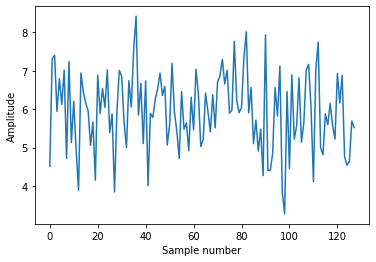

In [234]:
def noise_gen(num):
    signal_samp = np.random.random(num)
    
    return np.sum(signal_samp)


def generate_samples(nums_samps=128, length=12):

    signal_lst = []

    for _ in range(nums_samps):
        RND = noise_gen(length)
        signal_lst.append(RND)
    return signal_lst


lst_of_samps = generate_samples(128, 12)

plt.ylabel("Amplitude")
plt.xlabel("Sample number")
plt.plot(lst_of_samps)
plt.show()

Audio(lst_of_samps, rate=48000)  # sounds like a 808 snare

The examples belows converts a uniform distribution to a Gaussian distribution.  In each sample is created by adding twelve values from the random number generator. The pdf of is very nearly Gaussian, with a mean of six, and a standard deviation of one.

- Signals formed from random processes usually have a bell-shaped pdf. This is called a normal distribution, a Gauss distribution, named after the great German mathematician, Karl Friedrich Gauss(1777-1855). 


The example below shows a more of a uniform distribution.

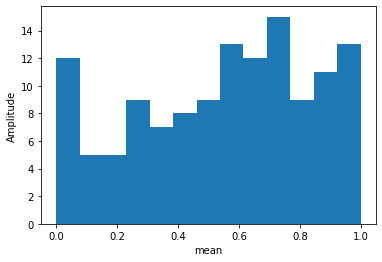

In [235]:
def noise_gen1():
    signal_samp = np.random.random()

    return np.sum(signal_samp)


def find_mean_of_signals(nums_samps=128):

    signal_means = []

    for _ in range(nums_samps):
        RND = noise_gen1()
        mean_ = np.mean(RND)
        signal_means.append(mean_)
    return signal_means


lst_of_means = find_mean_of_signals(128)
# print(find_mean_of_signals(signal,128, 12))

plt.ylabel("Amplitude")
plt.xlabel("mean")
plt.hist(lst_of_means, bins=13)
plt.show()

The example belows shows that when we combine two random number the pdf is a triangular distribution.

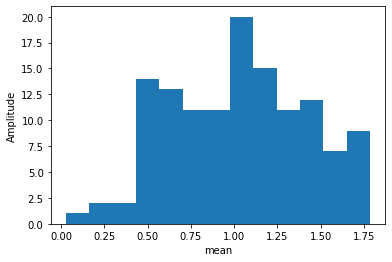

In [236]:
def noise_gen2(num):
    signal_samp = np.random.random(num)

    return np.sum(signal_samp)


def find_mean_of_signals(nums_samps=128, length=2):

    signal_means = []

    for _ in range(nums_samps):
        RND = noise_gen2(length)
        mean_ = np.mean(RND)
        signal_means.append(mean_)
    return signal_means


lst_of_means = find_mean_of_signals(128, 2)
# print(find_mean_of_signals(signal,128, 12))

plt.ylabel("Amplitude")
plt.xlabel("mean")
plt.hist(lst_of_means, bins=13)
plt.show()

The example belows shows that when we sum 12 random numbers the pdf is nearly normal distribution.

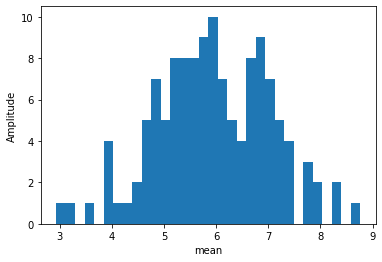

In [237]:
def noise_gen12(num):
    signal_samp = np.random.random(num)

    return np.sum(signal_samp)


def find_mean_of_signals(nums_samps=128, length=12):

    signal_means = []

    for _ in range(nums_samps):
        RND = noise_gen12(length)
        mean_ = np.mean(RND)
        signal_means.append(mean_)
    return signal_means


lst_of_means = find_mean_of_signals(128, 12)


plt.ylabel("Amplitude")
plt.xlabel("mean")
plt.hist(lst_of_means, bins=32)
plt.show()

The Fourier transform is commonly used to convert a signal in the time spectrum to a frequency spectrum. A Fourier Transform will break apart a time signal and will return information about the frequency of all sine waves needed to simulate that time signal.

Sine Wave formula:

y(t) = A * sin(2 * pi * f * t)
y(t) is the y axis sample we want to calculate for x axis sample t.

A is the amplitude.

pi is our old friend 3.14159.

f is the frequency.

t is our sample. Since we need to convert it to digital, we will divide it by the sampling rate.

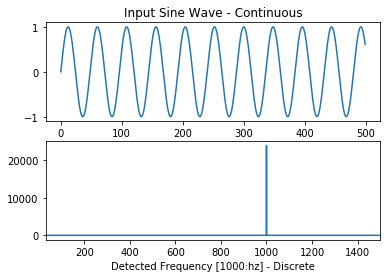

In [307]:
def generate_sine_with_fft(freq, num_samples=48000):

    sampling_rate = 48000.0

    sine_wave = [
        np.sin(2 * np.pi * freq * x / sampling_rate)
        for x in range(num_samples)
    ]

    data = np.array(sine_wave) # converting list to a numpy array.

    data_fft = np.fft.fft(data) # Using the FFT to decompose the sine wave data.

    frequencies = np.abs(data_fft) #The numpy abs() function will take our complex signal and generate the real part of it.

    return freq, sine_wave, data, frequencies


freq, sine_wave, data, frequencies = generate_sine_with_fft(1000) # adjust freq here


plt.subplot(2, 1, 1)

plt.plot(data[:500])

plt.title("Input Sine Wave - Continuous")

plt.subplot(2, 1, 2)

plt.plot(frequencies)

plt.xlabel(f"Detected Frequency [{freq}:hz] - Discrete")

plt.xlim(30, freq * 1.5)

plt.show()

Audio(sine_wave, rate=48000.0) # rate == sampling rate